# Lojistik Regresyon

Kütüphane'lerin import edilmesi

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')

## Model

Veri "pd.read_csv("diabetes.csv")" kodu ile okunur, "df = diabetes.copy()" kodu ile df adlı değişkene kopyalanır. Böylece diabets değişkeni orjinal veriyi tutarken df değişkeni üzerinde işlemler yapabiliriz. "df = df.dropna()" ile Null yani boş değerler silinir. "df.head()" ile verinin ilk 5 satırı alınır. Böylece veri hakkında bilgi edinilir.

In [10]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


"df.info()" bu kod ile veri içerisinde yer alan değişkenler ve bu değişkenlerin kaç tanesinin Non-Null yani boş olmayan veri olduğu ve tipi hakkında bilgi sağlanır.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


"df["Outcome"].value_counts()" kodu ile Outcome değişkeni ve bu değişken içerisindeki sınıflar ve bu sınıflardan kaçar tane bulunduğu hakkında bilgi sağlanır. Outcome değişkeni burada çıktı olarak 0 (Hasta değil) değerinden 500 adet bulundururken, 1 (Hasta) değerinden 268 adet bulundurur. En altta int64 tipinde bir veri olduğunu belirtmiştir.

In [15]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

"df["Outcome"].value_counts().plot.barh()" kodu ile bu dağılımlar grafik ile gösterilmiştir.

<Axes: ylabel='Outcome'>

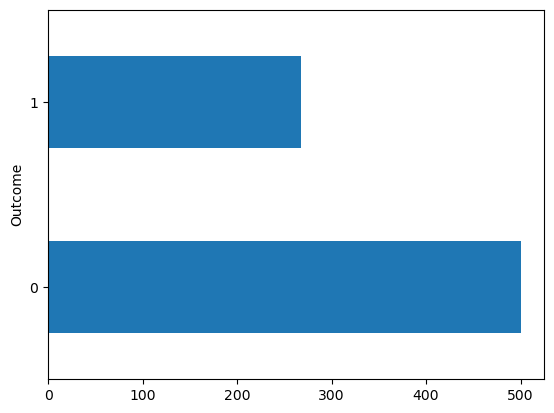

In [18]:
df["Outcome"].value_counts().plot.barh()

"df.describe().T" kodu verinin sayısal istatistiklerini verir. Örneğin count değişkenin kaç adet veri barındırdığını belirtir, mean değişkenin aritmetik ortalamasını hesaplar, std standart sapmayı hesaplar, min-max minimum ve maximum değerleri yazdırır. 

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Burada model eğitimine uygun bir formata getirmek için veri y değerleri diyabetli olup olmadığı yani yapılacak tahmin, X değerleri ise tahmin edilecek değişken dışındaki tüm değişkenler olacak şekilde ayrılır.

In [24]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

## statsmodels

In [27]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                 0.05922
Time:                        15:22:41   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## sckit-learn

In [30]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
loj_model.intercept_

array([-5.88019737])

In [34]:
loj_model.coef_

array([[ 1.17045482e-01,  2.83555213e-02, -1.69080861e-02,
         7.54243357e-04, -6.40171027e-04,  5.96312367e-02,
         6.76777175e-01,  7.20012161e-03]])

## Tahmin & Model Tuning

In [37]:
y_pred = loj_model.predict(X)

In [39]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [41]:
accuracy_score(y, y_pred)

0.7760416666666666

In [43]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [45]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [47]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35076827, 0.64923173],
       [0.9168311 , 0.0831689 ],
       [0.22483391, 0.77516609],
       [0.92117433, 0.07882567],
       [0.16753319, 0.83246681],
       [0.79872303, 0.20127697],
       [0.87988289, 0.12011711],
       [0.27775666, 0.72224334],
       [0.32082494, 0.67917506],
       [0.9224958 , 0.0775042 ]])

In [49]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [51]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [53]:
y_probs[0:10]

array([0.64923173, 0.0831689 , 0.77516609, 0.07882567, 0.83246681,
       0.20127697, 0.12011711, 0.72224334, 0.67917506, 0.0775042 ])

In [55]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [57]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [59]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [61]:
accuracy_score(y, y_pred)

0.7760416666666666

In [63]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [72]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64923173, 0.0831689 , 0.77516609, 0.07882567, 0.83246681])

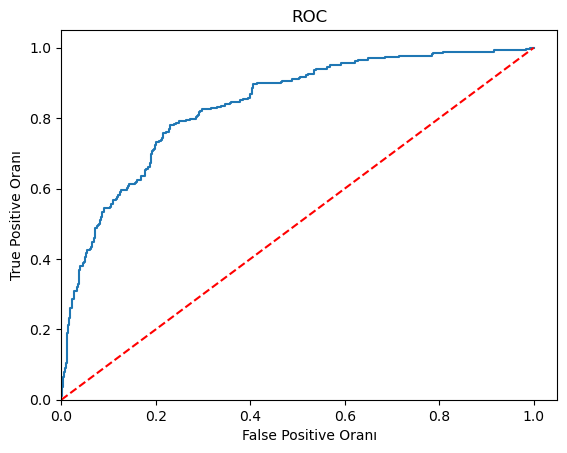

In [74]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, tresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [78]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [80]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [82]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

# Gaussian Naive Bayes

In [53]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [55]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [56]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [57]:
y_pred = nb_model.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [59]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Tahmin

In [60]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [61]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [62]:
y_pred = knn_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [67]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [68]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [70]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler:" + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler:{'n_neighbors': 11}


In [72]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [73]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [74]:
y_pred = knn_tuned.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC

## Model & Tahmin

In [4]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
svm_model = SVC(kernel="linear").fit(X_train, y_train)

In [6]:
svm_model

SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [12]:
svc_params = {"C": np.arange(1, 10)}
svc = SVC(kernel="linear")
svc_cv_model = GridSearchCV(svc, svc_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [13]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [14]:
svc_tuned = SVC(kernel="linear", C=5).fit(X_train, y_train)

In [16]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model & Tahmin# RBF SVC

## Model & Tahmin

In [18]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
rbf_svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [21]:
rbf_svc_model

SVC()

In [22]:
y_pred = rbf_svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [24]:
svc_params = {"C": [0.0001, 0.001, 0.01, 0.1, 0.3,0.5, 0.8, 1, 3, 5, 8, 10, 50, 100], 
                     "gamma": [0.0001, 0.001, 0.01, 0.1, 0.3,0.5, 0.8, 1, 3, 5, 8, 10, 50, 100]}

In [25]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                            cv = 10, n_jobs=-1, verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1, 3, 5,
                               8, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1,
                                   3, 5, 8, 10, 50, 100]},
             verbose=2)

In [26]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 8, 'gamma': 0.0001}


In [27]:
svc_tuned = SVC(C=8, gamma=0.0001).fit(X_train, y_train)

In [28]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

# Yapay Sinir Ağları

## Model & Tahmin

In [8]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [18]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [28]:
mlpc.coefs_

[array([[ 1.56824397e-01, -3.37505770e-02, -2.37643582e-02,
          9.84130506e-02,  3.20964717e-02, -3.10868504e-01,
         -2.07099677e-04,  1.10582432e-01,  9.23132169e-02,
          5.84399361e-02, -9.19295331e-02, -1.33387637e-01,
         -2.18355937e-01, -2.44803799e-01,  1.72898207e-01,
          2.45897826e-02,  1.81051883e-01,  2.43443011e-01,
          3.22043234e-02, -4.45430932e-02,  1.20022084e-01,
         -4.58490257e-01,  2.03886522e-01,  1.15408116e-01,
          3.02487465e-02,  1.75040210e-01, -2.20037179e-01,
         -1.01998919e-01, -1.96024032e-01,  1.30339601e-02,
          8.74454194e-02,  1.20772724e-01,  1.31425962e-01,
          2.09097105e-01, -4.73592657e-02, -2.99256967e-01,
         -3.80848827e-02,  7.54596713e-02,  2.67303027e-01,
         -3.11041265e-02,  5.52625791e-02, -4.39512703e-01,
         -1.28495984e-01,  2.35883138e-01,  1.05039952e-01,
         -3.14142190e-01,  5.47919271e-02,  9.08439371e-02,
         -1.88123525e-01, -7.00469251e-0

In [24]:
dir(mlpc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_parameter_constraints',
 '_predict',
 '_random_state',
 '

In [30]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [33]:
mlpc

MLPClassifier()

In [35]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\taha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defau

In [37]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001], 
               "hidden_layer_sizes": [(10,10,10), 
                                      (100, 100, 100), 
                                      (100, 100), 
                                      (3, 5), 
                                      (5, 3)], 
               "solver": ["lbfgs", "adam", "sgd"], 
               "activation": ["relu", "logistic", "tanh"]}

In [39]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                             cv=10, 
                             n_jobs=-1, 
                             verbose=2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [41]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [43]:
mlpc_tuned = MLPClassifier(activation= "relu", 
                           alpha= 0.0001, 
                           hidden_layer_sizes = (100, 100, 100), 
                           solver="adam")

In [45]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [49]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7056277056277056

# CART

## Model & Tahmin

In [88]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [110]:
cart_model

DecisionTreeClassifier()

In [112]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[5] <= 28.149999618530273 else 0) if x[5] <= 30.300000190734863 else 1 if
    x[5] <= 32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <=
    0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if
    x[7] <= 28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if
    x[1] <= 135.5 else 0) if x[2] <= 73.0 else 0) if x[2] <= 94.0 else 0 if
    x[1] <= 120.0 else 1) if x[5] <= 26.949999809265137 else (1 if x[1] <= 
    28.5 els

In [114]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [117]:
cart_grid = {"max_depth": range(1, 10), 
             "min_samples_split": list(range(2, 50))}

In [119]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs= -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [123]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [125]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)

In [127]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [171]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [177]:
rf_model

RandomForestClassifier()

In [179]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [182]:
rf_params = {"max_depth": [2, 5, 8, 10], 
             "max_features": [2, 5, 8], 
             "n_estimators": [10, 500, 1000], 
             "min_samples_split": [2, 5, 10]}

In [184]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)

In [186]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [192]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [202]:
rf_tuned = RandomForestClassifier(max_depth=8, 
                                  max_features=5, 
                                  min_samples_split=10, 
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=10,
                       n_estimators=1000)

In [204]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [206]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, 
                          index= X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

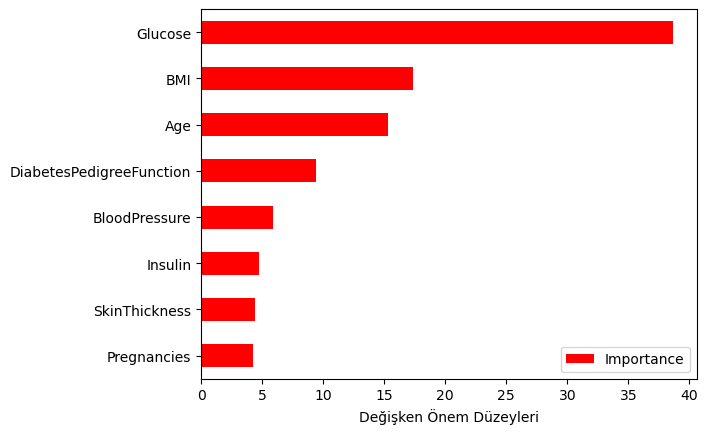

In [208]:
Importance.sort_values(by= "Importance", 
                       axis=0, 
                       ascending=True).plot(kind= "barh", color= "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

## Model

In [8]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [14]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [18]:
gbm_model

GradientBoostingClassifier()

In [20]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05], 
              "n_estimators": [100, 500, 100], 
              "max_depth": [3, 5, 10], 
              "min_samples_split": [2, 5, 10]}

In [22]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs= -1, verbose=2)

In [24]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [28]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [30]:
gbm = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100)

In [32]:
gbm_tuned = gbm.fit(X_train, y_train)

In [34]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# XGBoost

## Model

In [38]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
from xgboost import XGBClassifier

In [42]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [44]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [49]:
xgb_params = {"n_estimators": [100, 500, 1000, 2000], 
              "subsample": [0.6, 0.8, 1.0], 
              "max_depth": [3, 4, 5, 6], 
              "learning_rate": [0.1, 0.01, 0.02, 0.05], 
              "min_samples_split": [2, 5, 10]}

In [51]:
xgb = XGBClassifier()
xgb_model_cv = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)

In [53]:
xgb_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [57]:
xgb_model_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [7]:
xgb = XGBClassifier(learning_rate = 0.05, max_depth = 3, min_samples_split = 2)

# LightGBM

## Model

In [20]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [22]:
from lightgbm import LGBMClassifier

In [26]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [28]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [31]:
lgbm_params = {"n_estimators": [100, 500, 1000, 2000], 
              "subsample": [0.6, 0.8, 1.0], 
              "max_depth": [3, 4, 5, 6], 
              "learning_rate": [0.1, 0.01, 0.02, 0.05], 
              "min_child_samples": [5, 10, 20, 30]}

In [33]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2)

In [35]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20, 30],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [37]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 30,
 'n_estimators': 500,
 'subsample': 0.6}

In [39]:
lgbm = LGBMClassifier(learning_rate=0.01, 
                      max_depth= 3, 
                      subsample=0.6, 
                      n_estimators=500, 
                      min_child_samples=30)

In [41]:
lgbm_tuned = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [43]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# CatBoost

## Model & Tahmin

In [47]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [49]:
from catboost import CatBoostClassifier

In [51]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 152ms	remaining: 2m 32s
1:	learn: 0.6843414	total: 153ms	remaining: 1m 16s
2:	learn: 0.6805760	total: 154ms	remaining: 51.3s
3:	learn: 0.6765782	total: 155ms	remaining: 38.7s
4:	learn: 0.6720829	total: 156ms	remaining: 31.1s
5:	learn: 0.6681617	total: 158ms	remaining: 26.1s
6:	learn: 0.6641912	total: 158ms	remaining: 22.5s
7:	learn: 0.6602881	total: 159ms	remaining: 19.8s
8:	learn: 0.6562626	total: 160ms	remaining: 17.7s
9:	learn: 0.6528483	total: 161ms	remaining: 16s
10:	learn: 0.6487823	total: 162ms	remaining: 14.6s
11:	learn: 0.6454980	total: 163ms	remaining: 13.4s
12:	learn: 0.6418953	total: 164ms	remaining: 12.5s
13:	learn: 0.6374431	total: 165ms	remaining: 11.6s
14:	learn: 0.6339676	total: 166ms	remaining: 10.9s
15:	learn: 0.6304252	total: 167ms	remaining: 10.3s
16:	learn: 0.6266998	total: 168ms	remaining: 9.72s
17:	learn: 0.6237660	total: 169ms	remaining: 9.22s
18:	learn: 0.6204394	total: 170ms	remaining: 8.78s
19:	learn: 0.

In [53]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [57]:
catb_params = {'iterations': [200, 500], 
               'learning_rate': [0.01, 0.05, 0.1], 
               'depth': [3, 5, 8]}

In [59]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, 
                             cv=5, 
                             n_jobs=-1, 
                             verbose=2)
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 3.52ms	remaining: 701ms
1:	learn: 0.6811157	total: 5.79ms	remaining: 573ms
2:	learn: 0.6752970	total: 7.82ms	remaining: 513ms
3:	learn: 0.6697432	total: 10ms	remaining: 490ms
4:	learn: 0.6641758	total: 12.1ms	remaining: 471ms
5:	learn: 0.6576656	total: 14.4ms	remaining: 466ms
6:	learn: 0.6521870	total: 16.7ms	remaining: 462ms
7:	learn: 0.6465564	total: 19.2ms	remaining: 460ms
8:	learn: 0.6407595	total: 21.5ms	remaining: 457ms
9:	learn: 0.6357725	total: 23.4ms	remaining: 446ms
10:	learn: 0.6299942	total: 25.5ms	remaining: 437ms
11:	learn: 0.6240480	total: 27.7ms	remaining: 433ms
12:	learn: 0.6196095	total: 29.7ms	remaining: 427ms
13:	learn: 0.6148715	total: 31.8ms	remaining: 423ms
14:	learn: 0.6092626	total: 33.9ms	remaining: 418ms
15:	learn: 0.6046764	total: 36.1ms	remaining: 415ms
16:	learn: 0.6012725	total: 38.3ms	remaining: 412ms
17:	learn: 0.5958121	total: 40.4ms	remaining: 408ms
18:	learn: 0.59

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022A65DB9790>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [61]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [63]:
catb = CatBoostClassifier(iterations=200, 
                          learning_rate=0.01, 
                          depth=8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 2.73ms	remaining: 543ms
1:	learn: 0.6811157	total: 5.03ms	remaining: 498ms
2:	learn: 0.6752970	total: 7.07ms	remaining: 465ms
3:	learn: 0.6697432	total: 9.56ms	remaining: 469ms
4:	learn: 0.6641758	total: 11.6ms	remaining: 453ms
5:	learn: 0.6576656	total: 13.5ms	remaining: 438ms
6:	learn: 0.6521870	total: 15.7ms	remaining: 432ms
7:	learn: 0.6465564	total: 17.8ms	remaining: 428ms
8:	learn: 0.6407595	total: 19.9ms	remaining: 422ms
9:	learn: 0.6357725	total: 22.6ms	remaining: 430ms
10:	learn: 0.6299942	total: 24.9ms	remaining: 427ms
11:	learn: 0.6240480	total: 27.7ms	remaining: 435ms
12:	learn: 0.6196095	total: 30.1ms	remaining: 433ms
13:	learn: 0.6148715	total: 32.9ms	remaining: 437ms
14:	learn: 0.6092626	total: 35.4ms	remaining: 436ms
15:	learn: 0.6046764	total: 37.4ms	remaining: 430ms
16:	learn: 0.6012725	total: 40.1ms	remaining: 431ms
17:	learn: 0.5958121	total: 42.1ms	remaining: 425ms
18:	learn: 0.5903243	total: 44.2ms	remaining: 421ms
19:	learn: 0.5866024	t

In [65]:
accuracy_score(y_test, y_pred)

0.7532467532467533